In [2]:
#imports
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.linalg import eigh as largest_eigh
import cmath
import networkx as nx
import seaborn as sns


In [3]:
df = pd.read_excel("./manufacturing_emails_preprocessed.xlsx")


aggregatedDf = df.drop_duplicates(subset=['node1', 'node2']) #aggregate all links together (ignore timestamps)
edges = aggregatedDf[["node1", "node2", "timestamp"]].to_numpy() #array with all arcs, each row is an arc, with first column being origin node, second column is destination node
numberOfVertices = len(np.unique(edges[:, :2])) #number of vertices = the number of unique value in the two first columns of th eexcel sheet
g = ig.Graph(numberOfVertices, edges[:, :2])  #for edges, use all rows, but only two first columns (ignore timestamp)



	


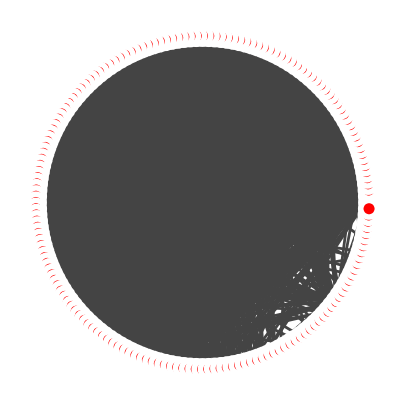

In [19]:
#plot the graph
fig, ax = plt.subplots(figsize=(5, 5))
ig.plot(
    g,
    target=ax,
    layout="circle",  # print nodes in a circular layout
    vertex_size=0.1,
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label_size=7.0,
)
#plt.show()
plt.savefig("graph.png")


In [4]:
#make networkx graph as well to test answers from igraph:
G = nx.Graph() 
G.add_edges_from(edges[:, :2])



In [5]:
#Task 1:

#number of nodes:
numberOfVertices = len(np.unique(edges[:, :2]))
print("Number of nodes/vertices: ", numberOfVertices)

#number of links:
numberOfLinks = len(edges)
print("Number of links: ", numberOfLinks)

#Average degree of graph:
averageDegree = ig.mean(g.degree())
print("Average degree of graph G is: ", averageDegree)

#Standard deviation of the degree of graph:
stdOfDegreeOfGraph = np.std(g.degree())
print("Standard deviation of degree of graph G is: ", stdOfDegreeOfGraph)

Number of nodes/vertices:  167
Number of links:  3250
Average degree of graph G is:  38.69047619047617
Standard deviation of degree of graph G is:  31.573601160612533


In [133]:
degreeArray = g.degree()[1:]
print(max(degreeArray))
print(min(degreeArray))

139
1


In [23]:
print(np.min(degreeArray))
print(np.max(degreeArray))

1
139


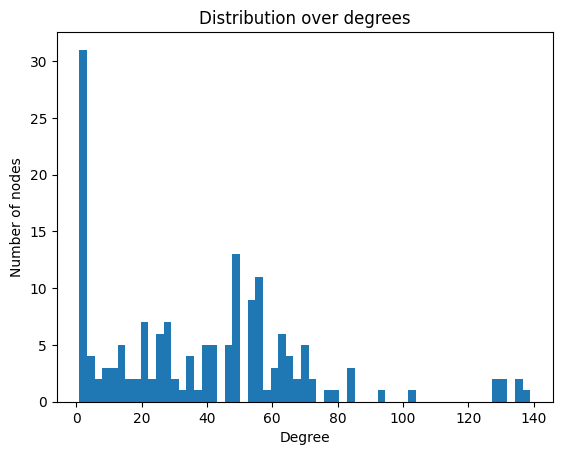

In [32]:
#Task 2:

#plot degree distribution:
degreeArray = g.degree()[1:] #first node is not in network (because we start with node id 1, but igraph assumes node id 0 exists, but remove this node)
fig, ax = plt.subplots(1, 1)
bins = np.linspace(1, 139, 60)
n, bins, patches = ax.hist(degreeArray, bins=bins)
ax.set_title("Distribution over degrees")
ax.set_ylabel("Number of nodes")
ax.set_xlabel("Degree")

plt.show()


#NOTE plottet gir ikke mening, utifra det ville man tenkt 140 nodes har distribution 1, 60 nodes har dist 5 etc! ! ! 
# bins burde være: diff mellom max data og min data delt på intervallet du ønsker
# -> grunnen var at du hadde byttet om x og y akse

#Which network model fits best: Erdos-Reenyi (ER) random graphs or scale-free (scale-free = power law dist)

#ER -> degree dist is binomial -> approaches poisson at N to infinity


#I think powerlaw looks somewhat reasonable as there are few number of nodes with high degree, and there tends to be more nodes with lower degree (but not exactly)
#for ER graph it tends to look more like a bell curve mere most nodes have the same number of links, you could argue there are just a few outliers, and if you ignore them, 
#it looks a bit like a bell curve (binomial distribution)
# -> therefore, follows powerlaw (scale-free)


In [11]:
#Task 3:
assortativity = g.assortativity_degree()
print("Assortivity: ",  assortativity)

Assortivity:  -0.2951772978930199


The physical meaning of assortativity is if nodes tend to be connected to other nodes of similar degree. It is the Pearson correlation coefficient, and is therefore a number between -1 and 1, where 1 means that the network is perfect assortative, while -1 means the network is perfect dissortative. Since the assortativity of this network is approximately -0.3, it means that nodes in the network, tend to be connected to other that do not have a similar degree. This means for example that nodes of low degree tend to be connected to nodes of high degree (instead of nodes with low degree tending to be connected to other nodes of low degree).

In [12]:
#Task 4:

#global
clusteringCoefficient = g.transitivity_undirected()
print("Clustering coefficient: ", clusteringCoefficient)


networkXCluster = nx.average_clustering(G)
print("Networkx clustering coefficient: ", networkXCluster)

clustering = nx.clustering(G)
print("Test: ", np.mean(np.array(list(clustering.values()))))
#NOTE: assume they mean average clustering coefficient

Clustering coefficient:  0.5412664316573972
Networkx clustering coefficient:  0.5918632085486949
Test:  0.591863208548695


In [13]:
#Task 5

#get all node pairs
allNodePairs = []
for i in range(1, 168):
    for j in range(1, 168):
        if (i != j):
            allNodePairs.append((i,j))




In [14]:
#get number of node in shortest path between each pair of node

hopCountPerPair = []

for pair in allNodePairs:
	start, end = pair
	hopcount = g.get_shortest_paths(start, to=end, output = "vpath")
	
	hopCountPerPair.append(len(hopcount[0])-1)

In [15]:
averageHopcount =  np.mean(np.array(hopCountPerPair))
print("average hopcount is: ", averageHopcount)

maximumHopCount = np.max(np.array(hopCountPerPair)) #the diameter of a graph is the maximum hopcount
print("Diameter of graph is: ", maximumHopCount)

#NOTE: we ignored each node going to itself! (only unique pairs)

average hopcount is:  1.9673905201644903
Diameter of graph is:  5


In [58]:
#Networkx task 5 check:
results = []
for n1 in G.nodes():
    for n2 in G.nodes():
        if (n1 != n2):
            shortest_path = nx.single_source_dijkstra(G, source=n1, target=n2)
            results.append(shortest_path)
print(len(results))
tot = 0
maxEle = -1
for i in range(len(results)):
    tot += results[i][0]
    maxEle = max(maxEle, results[i][0])
print(tot)
print("average hopcount: ", tot/len(results))
print("diameter: ", maxEle)

In [16]:
#Task 6
#check if small world prop

sparseHopcount = np.log(numberOfVertices)/np.log(averageDegree)
print("Sparse hopcount: ", sparseHopcount)
print("Since this is in the same range as the average hopcount of our graph, we say the network has the small world property")


Sparse hopcount:  1.4000445742518
Since this is in the same range as the average hopcount of our graph, we say the network has the small world property


Is small world prop?  
Large clustering coefficient is typical for small world networks. This network's clustering coefficient 0.59, which it higher than average (considering the value is between 0 and 1)  
Should also look at the distance between nodes with thier shortest path. The average is less than 2, meaning that on average, to reach any node from the current node, one needs less  
than 2 nodes, which we consider as low. We therefore regard this network to have the small world property   

In [17]:
#Task 7:
adjMatrix = g.get_adjacency()
adjMatrix = adjMatrix[1:, 1:]

w, v = np.linalg.eig(list(adjMatrix))
maxreal = w.real.max()  # maximum real part
maximag = w.imag.max()  # maximum imaginary part
maxabs = np.abs(w).max()  #max abs part

print(maxreal, maximag, maxabs) #NOTE: found from this page: https://dsp.stackexchange.com/questions/22807/how-can-i-get-maximum-complex-value-from-an-array-of-complex-values524289-in-p

60.63926551053454 2.4558806558790013e-17 60.63926551053454


In [18]:
#Task 7 check with networkx
adjMat = nx.adjacency_matrix(G).asfptype()
eigenValues = sc.sparse.linalg.eigs(adjMat)[0] # index 1 is the eigenvectors
print("largest eigenvalue: ", max(eigenValues))

largest eigenvalue:  (60.63926551053454+0j)


I think this makes sense, can still report largest imaginary as well tho, as well as reason about why adjacency matrix produces imaginary eigenvalues  
(was something about cycles I think?)

In [19]:
df = pd.read_excel("./manufacturing_emails_preprocessed.xlsx")
groupedDf = df.groupby(["node1", "node2"])["timestamp"].apply(list).reset_index(name="new")


max:  2902 1


C:\Users\eivin\AppData\Local\Temp\ipykernel_25400\81914210.py:26: RuntimeWarning: divide by zero encountered in power
  y = (x**(-3.4874551358790713))


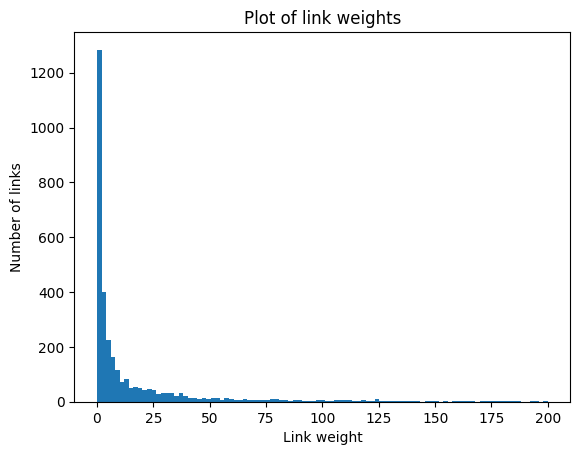

In [20]:
#Task 8:
def getLength(row):
    return len(row[2])

groupedDf = df.groupby(["node1", "node2"])["timestamp"].apply(list).reset_index(name="new")
#groupedDf.head()

for i in range(len(groupedDf)):
    arr = groupedDf.iloc[i]["new"]
    groupedDf.at[i,'new'] = len(arr)
linkWeights = groupedDf["new"].to_numpy()
bins = np.linspace(0, 500, 150)
plt.xlabel="Number of connections"
plt.ylabel="Number of nodes"
fig, ax = plt.subplots(1, 1)
print("max: ", np.max(linkWeights), np.min(linkWeights))
bins = np.linspace(0, 200, 100)

# these two lines under show my weights are along x axis
# linkWeights.sort()
# linkWeights = linkWeights[-50:]
n, bins, patches = ax.hist(linkWeights, bins=bins)

#plotting a power law distribution
x = np.linspace(0, 500, 100)
y = (x**(-3.4874551358790713))


#plt.plot(x, y)


ax.set_title("Plot of link weights")
ax.set_ylabel('Number of links')
ax.set_xlabel('Link weight')

plt.savefig('task8.eps', format='eps')
plt.show()

In [33]:
np.max(linkWeights)

2902

alpha=  1.357777230330988   sigma=  0.006275827779745023


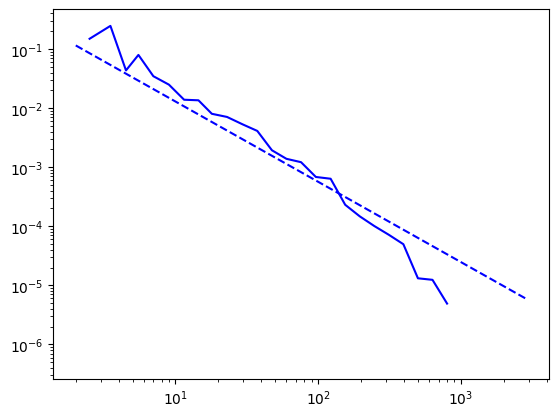

In [153]:
#Testing task 8:
import powerlaw
fit = powerlaw.Fit(np.array(linkWeights)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)
plt.savefig('task8IsPowerlaw.eps', format='eps')

The plot above shows that our linkweight distribution closely follows a powerlaw distribution (and fits best with alpha=  1.357777230330988   sigma=  0.006275827779745023)  
The reason is because the line is close to linear on a log-log plot (which means if one variable changes with a power of another variable, the log-log plot will be a linear line) 
(power law is y = c*K**(-tau) -> take log of both sides: log(y) = log(c*K**(-tau)) = log(c) + log(K**(-tau)) = log(c) - tau*log(K) -> which is linear)   
Data also looks to follow powerlaw when just plotting it (few values with high link weights, more values the lower the link weight)  
Source: https://statisticsbyjim.com/regression/log-log-plots/ for info about powerlaw, and https://pythonhosted.org/powerlaw/ for powerlaw package



In [ ]:
#Extra:

def isConnectedOverWholePeriod(arr):
	"""for an array, check if largest gap is > than 20 sec over whole period (0, T], if so return False, else return True"""
	T = 1422
	arr.append(T) 
	for i in range(1, len(arr)):
		if (arr[i] - arr[i-1] > 20 and arr[i-1] < 1422):
			return False
	return True

#are connected by a link if they have at least a contact over the whole period (0, T]
groupedDf = df.groupby(["node1", "node2"])["timestamp"].apply(list).reset_index(name="new")
#groupedDf.head()

count = 0
for i in range(len(groupedDf)):
	if (isConnectedOverWholePeriod(groupedDf["new"][i])): 
		count += 1
print("COUNT: ", count)
#print(isConnectedOverWholePeriod(a))